<a href="https://colab.research.google.com/github/GDharan10/Project10_RetailAndWarehouseSalesAnalysis/blob/main/RetailAndWarehouseSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **Data collection**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Task/Retail and Warehouse Sales Analysis/Warehouse_and_Retail_Sales.csv")

# **Data Preprocessing**

In [3]:
df.head(2)

YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   

            ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  RETAIL TRANSFERS  \
0        BOOTLEG RED - 750ML      WINE           0.0               0.0   
1  MOMENT DE PLAISIR - 750ML      WINE           0.0               1.0   

   WAREHOUSE SALES  
0              2.0  
1              4.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [5]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

count         mean         std      min     25%      50%  \
YEAR              307477.0  2018.438238    1.083080  2017.00  2017.0  2019.00   
MONTH             307477.0     6.424064    3.461853     1.00     3.0     7.00   
RETAIL SALES      307477.0     7.003644   30.387012    -6.49     0.0     0.32   
RETAIL TRANSFERS  307477.0     6.938177   30.244239   -38.49     0.0     0.00   
WAREHOUSE SALES   307477.0    25.375561  249.500572 -4996.00     0.0     1.00   

                      75%       max  
YEAR              2019.00   2020.00  
MONTH                9.00     12.00  
RETAIL SALES         3.26   1816.49  
RETAIL TRANSFERS     3.00   1990.83  
WAREHOUSE SALES      5.00  18317.00

In [9]:
df.describe(include=['object']).T

count unique                                top    freq
SUPPLIER          307477    396  REPUBLIC NATIONAL DISTRIBUTING CO   20994
ITEM CODE         307477  34039                             327647      24
ITEM DESCRIPTION  307477  34805           BURGANS ALBARINO - 750ML      44
ITEM TYPE         307477      8                               WINE  187640

In [10]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [11]:
fig = px.box(df, y='RETAIL SALES', title='Boxplot of RETAIL SALES')
fig.show()

In [12]:
fig = px.box(df, y='RETAIL TRANSFERS', title='Boxplot of RETAIL TRANSFERS')
fig.show()

In [13]:
fig = px.box(df, y='WAREHOUSE SALES', title='Boxplot of WAREHOUSE SALES')
fig.show()

In [14]:
# Clean data and convert 'YEAR' and 'MONTH' to datetime
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df.dropna(subset=['YEAR', 'MONTH'], inplace=True)
df['DATE'] = pd.to_datetime(df['YEAR'].astype(int).astype(str) + '-' + df['MONTH'].astype(int).astype(str), format='%Y-%m')

# **1. Temporal Sales Analysis:**

In [15]:
# Group by year and month, and sum the sales
monthly_sales = df.groupby(['DATE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum()

# Plotting sales trends over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['RETAIL SALES'], marker='o', linestyle='-', color='b', label='Retail Sales')
plt.plot(monthly_sales.index, monthly_sales['WAREHOUSE SALES'], marker='o', linestyle='-', color='r', label='Warehouse Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Group by item type and month, and sum the sales
monthly_sales_by_type = df.groupby(['ITEM TYPE', 'DATE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Plotting seasonal patterns by item type
plt.figure(figsize=(16, 10))
sns.lineplot(x='DATE', y='RETAIL SALES', hue='ITEM TYPE', data=monthly_sales_by_type, marker='o', palette='Set1')
plt.title('Seasonal Patterns in Retail Sales by Item Type')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
sns.lineplot(x='DATE', y='WAREHOUSE SALES', hue='ITEM TYPE', data=monthly_sales_by_type, marker='o', palette='Set2')
plt.title('Seasonal Patterns in Warehouse Sales by Item Type')
plt.xlabel('Date')
plt.ylabel('Warehouse Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# **2. Supplier Performance Analysis:**

In [17]:
# Group by supplier and sum the sales
supplier_sales = df.groupby('SUPPLIER')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()
# Calculate total sales (retail + warehouse)
supplier_sales['TOTAL SALES'] = supplier_sales['RETAIL SALES'] + supplier_sales['WAREHOUSE SALES']

In [18]:
# Calculate average total sales
average_sales = supplier_sales['TOTAL SALES'].mean()  # Using mean as average
# Define thresholds for categorization
threshold_high = average_sales * 2  # Top-performing threshold (e.g., 50% above average)
threshold_low = average_sales * 0.5   # Underperforming threshold (e.g., 50% below average)
# Function to categorize suppliers based on total sales
def categorize_supplier(sales):
    if sales >= threshold_high:
        return 'Top-performing suppliers'
    elif sales <= threshold_low:
        return 'Underperforming suppliers'
    else:
        return 'Average-performing suppliers'

# Apply categorization function to create 'SUPPLIER_TYPE' column
supplier_sales['SUPPLIER_TYPE'] = supplier_sales['TOTAL SALES'].apply(categorize_supplier)

In [19]:
# Sort suppliers by total sales
supplier_sales_sorted = supplier_sales.sort_values(by='TOTAL SALES', ascending=False)

# Select top 10 and bottom 10 suppliers
top_10 = supplier_sales_sorted.head(10)
bottom_10 = supplier_sales_sorted.tail(10)

<ipython-input-20-015518665715>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




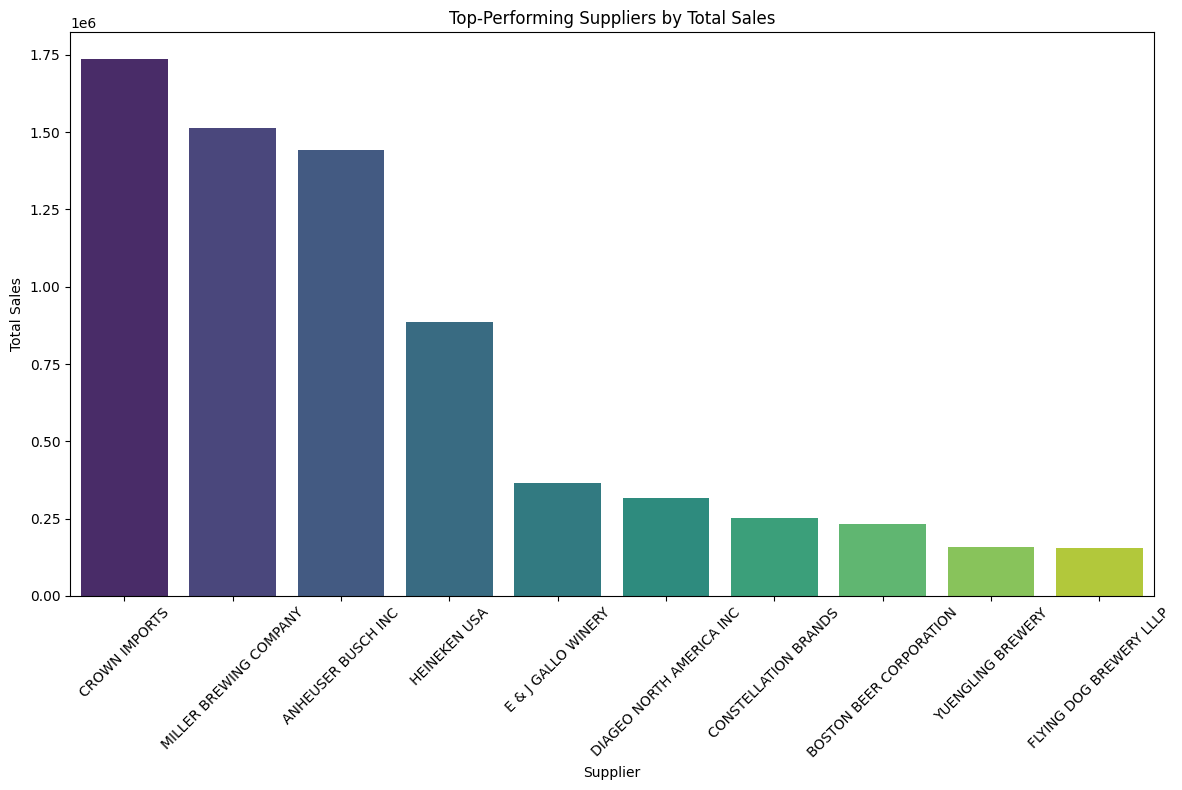

In [20]:
# Plotting top-performing suppliers (Top 10)
plt.figure(figsize=(12, 8))
sns.barplot(x='SUPPLIER', y='TOTAL SALES', data=top_10, palette='viridis')
plt.title('Top-Performing Suppliers by Total Sales')
plt.xlabel('Supplier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-21-bba4a685f4f9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




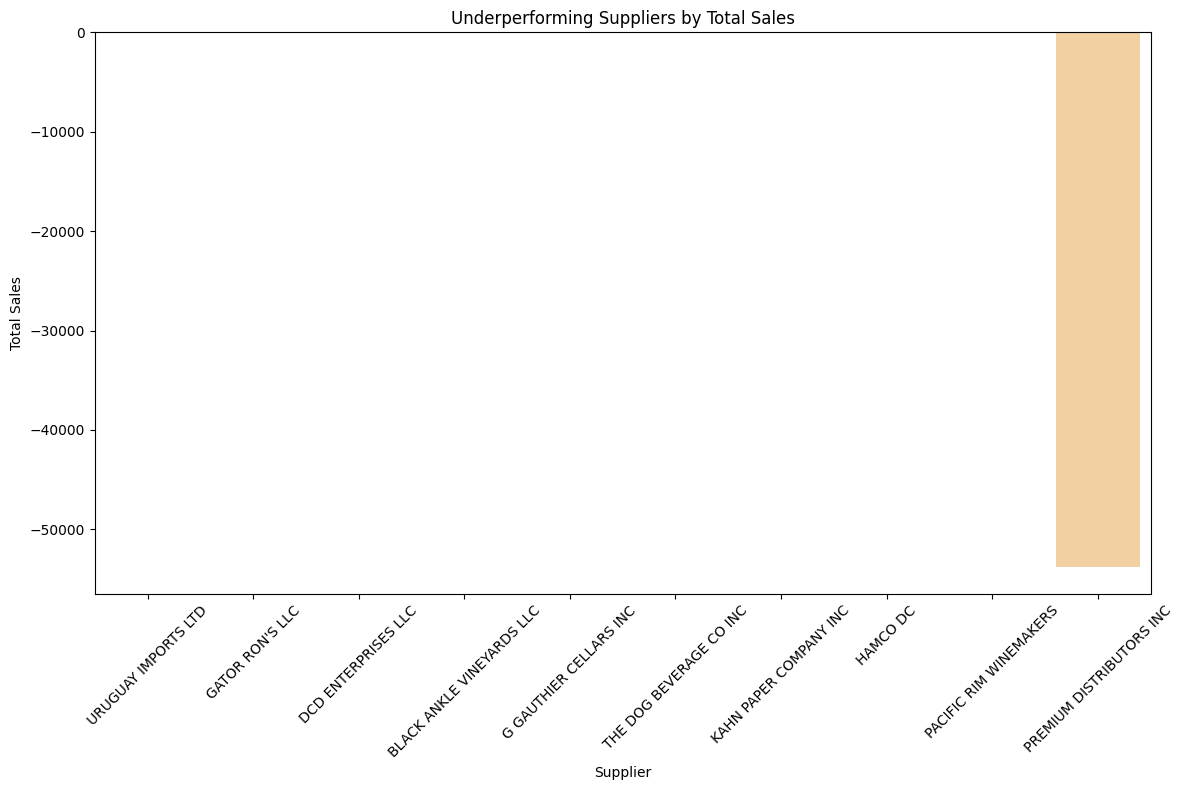

In [21]:
# Plotting underperforming suppliers (Bottom 10)
plt.figure(figsize=(12, 8))
sns.barplot(x='SUPPLIER', y='TOTAL SALES', data=bottom_10, palette='magma')
plt.title('Underperforming Suppliers by Total Sales')
plt.xlabel('Supplier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-f3e39ca2cd5c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




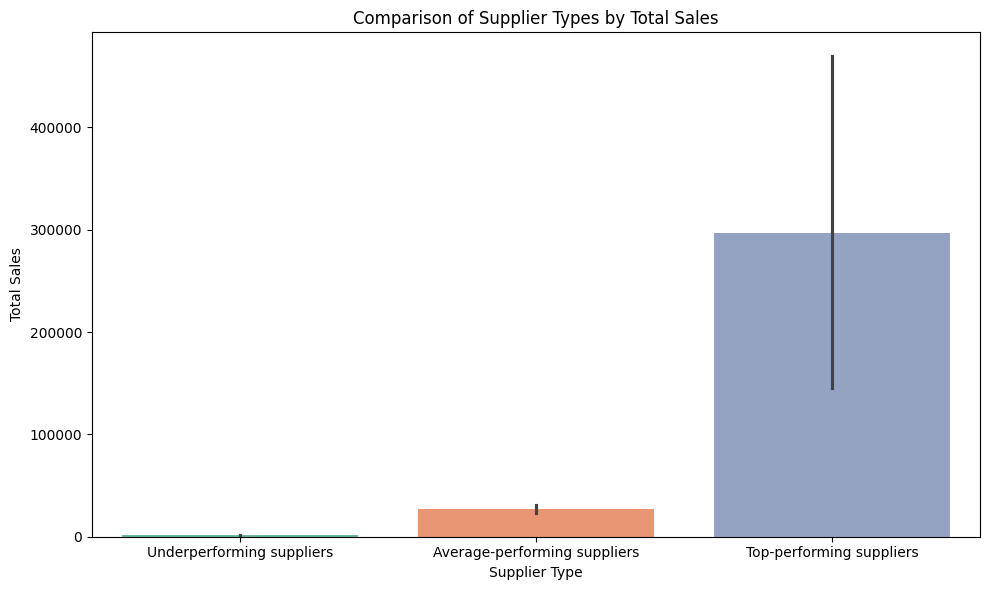

In [22]:
# Plotting top-performing vs average-performing vs underperforming suppliers
plt.figure(figsize=(10, 6))
sns.barplot(x='SUPPLIER_TYPE', y='TOTAL SALES', data=supplier_sales, palette='Set2')
plt.title('Comparison of Supplier Types by Total Sales')
plt.xlabel('Supplier Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **3. Item Type Analysis:**

In [23]:
# Group by item type and sum the sales
item_sales = df.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate total sales (retail + warehouse)
item_sales['TOTAL SALES'] = item_sales['RETAIL SALES'] + item_sales['WAREHOUSE SALES']

In [24]:
# Sort item types by total sales
item_sales_sorted = item_sales.sort_values(by='TOTAL SALES', ascending=False)

# Identify the most popular item type
most_popular_item_type = item_sales_sorted.iloc[0]

# Identify the least popular item type
least_popular_item_type = item_sales_sorted.iloc[-1]

print("Most Popular Item Type:")
print(most_popular_item_type)

print("\nLeast Popular Item Type:")
print(least_popular_item_type)

Most Popular Item Type:
ITEM TYPE                BEER
RETAIL SALES        574220.53
WAREHOUSE SALES    6527236.51
TOTAL SALES        7101457.04
Name: 0, dtype: object

Least Popular Item Type:
ITEM TYPE           DUNNAGE
RETAIL SALES            0.0
WAREHOUSE SALES   -121307.0
TOTAL SALES       -121307.0
Name: 1, dtype: object


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting sales distribution across item types
plt.figure(figsize=(12, 8))
sns.barplot(x='ITEM TYPE', y='TOTAL SALES', data=item_sales_sorted, palette='coolwarm')
plt.title('Sales Distribution Across Item Types')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-25-8d5dda267370>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




# **4. Item-Specific Sales Analysis:**

In [26]:
# Group by item description and item code, then sum the sales
item_sales = df.groupby(['ITEM DESCRIPTION', 'ITEM CODE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Calculate total sales for each item (retail + warehouse)
item_sales['TOTAL SALES'] = item_sales['RETAIL SALES'] + item_sales['WAREHOUSE SALES']


In [27]:
# Sort items by retail sales
top_retail_sales = item_sales.sort_values(by='RETAIL SALES', ascending=False).head(10)
least_retail_sales = item_sales.sort_values(by='RETAIL SALES', ascending=True).head(10)

# Sort items by warehouse sales
top_warehouse_sales = item_sales.sort_values(by='WAREHOUSE SALES', ascending=False).head(10)
least_warehouse_sales = item_sales.sort_values(by='WAREHOUSE SALES', ascending=True).head(10)

# Display top and least selling items
print("Top 10 Selling Items in Retail Sales:")
print(top_retail_sales[['ITEM DESCRIPTION', 'RETAIL SALES']])

print("\nLeast 10 Selling Items in Retail Sales:")
print(least_retail_sales[['ITEM DESCRIPTION', 'RETAIL SALES']])

print("\nTop 10 Selling Items in Warehouse Sales:")
print(top_warehouse_sales[['ITEM DESCRIPTION', 'WAREHOUSE SALES']])

print("\nLeast 10 Selling Items in Warehouse Sales:")
print(least_warehouse_sales[['ITEM DESCRIPTION', 'WAREHOUSE SALES']])


Top 10 Selling Items in Retail Sales:
                                ITEM DESCRIPTION  RETAIL SALES
32029              TITO'S HANDMADE VODKA - 1.75L      27580.50
9380                CORONA EXTRA LOOSE NR - 12OZ      25064.00
16532                   HEINEKEN LOOSE NR - 12OZ      17761.00
22357                MILLER LITE 30PK CAN - 12OZ      14440.00
5182                          BUD LIGHT 30PK CAN      12299.00
4787                      BOWMAN'S VODKA - 1.75L      12126.72
22347  MILLER LITE  HIGH GRAPHIC LOOSE NR - 12OZ      10373.77
30279            STELLA ARTOIS LOOSE NR - 11.2OZ      10354.00
9377                 CORONA EXTRA 2/12 NR - 12OZ       9755.19
25565                     PINNACLE VODKA - 1.75L       8676.40

Least 10 Selling Items in Retail Sales:
                                   ITEM DESCRIPTION  RETAIL SALES
21389  MARCHESI DI BAROLO BAROLO      31343 - 750ML         -0.25
4478                     BON APPETIT MUSCAT - 750ML         -0.18
69          1800 SILVER TEQUIL